
#Víz mérgezettségi fokának becsülése



In [ ]:
# Imports
import numpy as np

#%tensorflow_version 2.x
#import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [ ]:


!wget -nc -P . dataset

--2023-11-04 09:44:11--  https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc23_p2_hw/qsar_fish_toxicity_noisy.csv
Resolving nipg12.inf.elte.hu (nipg12.inf.elte.hu)... 157.181.160.172
Connecting to nipg12.inf.elte.hu (nipg12.inf.elte.hu)|157.181.160.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29621 (29K) [text/csv]
Saving to: ‘./qsar_fish_toxicity_noisy.csv’

qsar_fish_toxicity_ 100%[===================>]  28.93K  --.-KB/s    in 0.1s    

2023-11-04 09:44:12 (259 KB/s) - ‘./qsar_fish_toxicity_noisy.csv’ saved [29621/29621]



In [ ]:
# Open and load file contents as a list of strings (lines)

with open('qsar_fish_toxicity_noisy.csv') as f:
  content = ''.join(f.readlines())

print(content[:500])

# Implement your solution below

lista=np.array(content.split('\n'))

headings=np.array(lista[0].split(','))
lista=lista[1:]
labels=np.array([],dtype=np.float32)
asd=[]
for e in range(len(lista)-1):
  sor=lista[e].split(",")
  if sor[1]=='0.0':
    sor[1]=np.nan
  if sor[2]=='0.0':
      sor[2]=np.nan


  labels=np.append(labels,np.float32(sor[-1]))
  sor=sor[:-1]
  asd.append(sor)

features_noisy=np.array(asd,dtype=np.float32)
print("\nNan count:",np.sum(np.isnan(features_noisy)))

CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
3.26,0.829,0.0,0,1,1.453,3.77
2.189,0.58,0.863,0,0,1.348,3.115
2.125,0.638,0.831,0,0,1.348,3.531
3.027,0.331,1.472,1,0,1.807,3.51
2.094,0.827,0.86,0,0,1.886,5.39
3.222,0.331,2.177,0,0,0.706,1.819
3.179,0.0,1.063,0,0,2.942,3.947
3,0.0,0.938,1,0,2.851,3.513
2.62,0.0,0.99,0,0,2.942,4.402
2.834,0.134,0.0,0,0,1.591,3.021
2.405,0.134,0.843,0,0,1.769,3.21
2.728,0.0,0.953,0,0,1.591,2.371
2.512,0.223,0.929,1,0,1.769,3.919
2.834,0.134,1.237,0,0,1.859,3.03
2.819

Nan count: 388


In [ ]:
features=features_noisy.copy()
a,b=np.where(np.isnan(features))
features[a,b]=np.nanmedian(features[:,b])

In [ ]:
np.random.seed(42)
perm = np.random.permutation(len(labels))
perm_labels=labels[perm]
perm_features=features[perm]

x_train, x_val, x_test = perm_features[:int(0.6*len(labels))],perm_features[int(0.6*len(labels)):int(0.8*len(labels))],perm_features[int(0.8*len(labels)):]
y_train, y_val, y_test = perm_labels[:int(0.6*len(labels))],perm_labels[int(0.6*len(labels)):int(0.8*len(labels))],perm_labels[int(0.8*len(labels)):]

###Regressziós modellel

In [ ]:
class RegressionModel(torch.nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.input_layer = nn.Linear(input_dim, 50)
        self.middle_layer = nn.Linear(50, 30)
        self.output_layer = nn.Linear(30, 1)

    def forward(self, x):
        x = torch.tanh(self.input_layer(x))
        x = torch.relu(self.middle_layer(x))
        x = self.output_layer(x)
        return x

input_dim = x_train.shape[1]
reg_model = RegressionModel(input_dim)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(reg_model.parameters(), lr=1e-3)

def mean_absolute_error(y_true, y_pred):
    return torch.abs(y_true - y_pred).mean()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([22])) that is different to the input size (torch.Size([22, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Training Loss: 15.1367, MAE: 3.6101, Validation Loss: 11.4911
Epoch 2, Training Loss: 7.9622, MAE: 2.4589, Validation Loss: 5.3743
Epoch 3, Training Loss: 3.6551, MAE: 1.5365, Validation Loss: 2.8555
Epoch 4, Training Loss: 2.3823, MAE: 1.1983, Validation Loss: 2.3989
Epoch 5, Training Loss: 2.1969, MAE: 1.1499, Validation Loss: 2.3433
Epoch 6, Training Loss: 2.1748, MAE: 1.1449, Validation Loss: 2.3335
Epoch 7, Training Loss: 2.1684, MAE: 1.1435, Validation Loss: 2.3289
Epoch 8, Training Loss: 2.1635, MAE: 1.1423, Validation Loss: 2.3254
Epoch 9, Training Loss: 2.1591, MAE: 1.1412, Validation Loss: 2.3223
Epoch 10, Training Loss: 2.1549, MAE: 1.1401, Validation Loss: 2.3195
Epoch 11, Training Loss: 2.1510, MAE: 1.1391, Validation Loss: 2.3169
Epoch 12, Training Loss: 2.1474, MAE: 1.1381, Validation Loss: 2.3145
Epoch 13, Training Loss: 2.1440, MAE: 1.1373, Validation Loss: 2.3123
Epoch 14, Training Loss: 2.1408, MAE: 1.1364, Validation Loss: 2.3102
Epoch 15, Training Loss: 2.

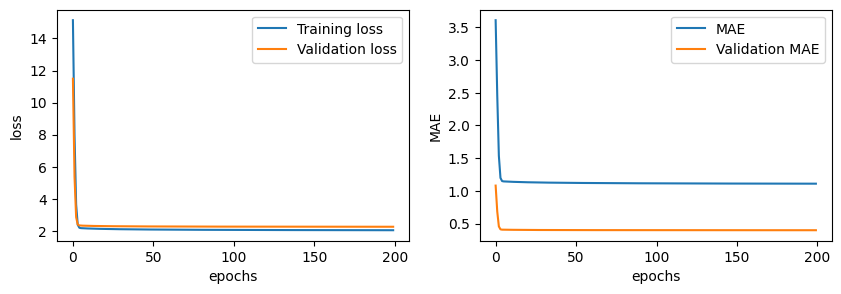

In [ ]:

x_train_tensor = torch.Tensor(x_train)
y_train_tensor = torch.Tensor(y_train)
x_val_tensor = torch.Tensor(x_val)
y_val_tensor = torch.Tensor(y_val)
x_test_tensor = torch.Tensor(x_test)
y_test_tensor = torch.Tensor(y_test)

batch_size=32

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

best_val_loss = float('inf')
patience = 15
train_losses=np.array([])
val_losses=np.array([])
mae_history=np.array([])
mae_val_history=np.array([])
for epoch in range(200):
    reg_model.train()
    train_loss = 0.0
    train_mae = 0.0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = reg_model(inputs)
        loss = criterion(outputs, targets)
        mae = mean_absolute_error(outputs,targets)

        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_mae += mae.item()

    train_loss /= len(train_loader)
    train_mae /= len(train_loader)
    train_losses=np.append(train_losses,train_loss)
    mae_history=np.append(mae_history,train_mae)

    reg_model.eval()
    val_loss = 0.0
    val_mae = 0.0

    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = reg_model(inputs)
            loss = criterion(outputs, targets)
            mae = mean_absolute_error(outputs,targets)
            val_loss += loss.item()
            val_mae += mae.item()


    val_loss /= len(val_loader)
    val_mae /= len(train_loader)
    val_losses=np.append(val_losses,val_loss)

    mae_val_history=np.append(mae_val_history,val_mae)
    print(f'Epoch {epoch + 1}, Training Loss: {train_loss:.4f}, MAE: {train_mae:.4f}, Validation Loss: {val_loss:.4f}')

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1

    if early_stopping_counter >= patience:
        print(f'Early stopping after {epoch + 1} epochs.')
        break

test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

reg_model.eval()
test_mse = 0.0
test_mae=0.0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = reg_model(inputs)
        loss = criterion(outputs, targets)
        mae = mean_absolute_error(outputs,targets)
        test_mse += loss.item()
        test_mae += mae.item()

test_mse /= len(test_loader)
test_mae /= len(test_loader)

print(f'Test MSE: {test_mse:.4f}')
print(f'Test MAE: {test_mae:.4f}')

X = x_test_tensor[:15]
reg_model.eval()
with torch.no_grad():
    preds = reg_model(X).squeeze().tolist()

print("Predictions:",preds)
print("Actual Values:", y_test_tensor[:15].tolist())



fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("loss")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("MAE")
ax[0].plot(train_losses, label="Training loss")
ax[0].plot(val_losses, label="Validation loss")
ax[1].plot(mae_history, label="MAE")
ax[1].plot(mae_val_history, label="Validation MAE")
ax[0].legend()
ax[1].legend()
plt.show()

###Klasszifikációs modellel

In [ ]:
y_concat=np.concatenate([y_train.copy(), y_val.copy(), y_test.copy()])
y_concat_sorted =np.sort(y_concat , axis=0)
pivot=len(y_concat)//4
tresholds=[y_concat_sorted[pivot],y_concat_sorted[pivot*2],y_concat_sorted[pivot*3]]
y_cat_train, y_cat_val, y_cat_test = y_train.copy(), y_val.copy(), y_test.copy()
#train
y_cat_train[y_cat_train<=tresholds[0]]=0
y_cat_train[(y_cat_train<=tresholds[1]) & (y_cat_train>tresholds[0])]=1
y_cat_train[(y_cat_train<=tresholds[2]) & (y_cat_train>tresholds[1])]=2
y_cat_train[y_cat_train>tresholds[2]]=3
#val
y_cat_val[y_cat_val<=tresholds[0]]=0
y_cat_val[(y_cat_val<=tresholds[1]) & (y_cat_val>tresholds[0])]=1
y_cat_val[(y_cat_val<=tresholds[2]) & (y_cat_val>tresholds[1])]=2
y_cat_val[y_cat_val>tresholds[2]]=3
#test
y_cat_test[y_cat_test<=tresholds[0]]=0
y_cat_test[(y_cat_test<=tresholds[1]) & (y_cat_test>tresholds[0])]=1
y_cat_test[(y_cat_test<=tresholds[2]) & (y_cat_test>tresholds[1])]=2
y_cat_test[y_cat_test>tresholds[2]]=3

In [ ]:
y_onehot_train=np.zeros((len(y_cat_train),4),dtype=int)
x=np.arange(len(y_cat_train))
y=y_cat_train.astype(int)
y_onehot_train[x,y]=1
y_onehot_val=np.zeros((len(y_cat_val),4),dtype=int)
x=np.arange(len(y_cat_val))
y=y_cat_val.astype(int)
y_onehot_val[x,y]=1
y_onehot_test=np.zeros((len(y_cat_test),4),dtype=int)
x=np.arange(len(y_cat_test))
y=y_cat_test.astype(int)
y_onehot_test[x,y]=1

In [ ]:
class ClassificationModel(nn.Module):
    def __init__(self,input_dim):
        super(ClassificationModel, self).__init__()
        self.input_layer = nn.Sequential(
            nn.Linear(input_dim, 50),
            nn.ReLU()
        )
        self.middle_layer = nn.Dropout(p=0.3)
        self.output_layer = nn.Sequential(
            nn.Linear(50, 4),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.input_layer(x)
        x = self.middle_layer(x)
        x = self.output_layer(x)
        return x




input_dim = x_train.shape[1]
cl_model = ClassificationModel(input_dim)
batch_size=16
optimizer = torch.optim.SGD(cl_model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5, verbose=True)

y_train_indices = torch.tensor(np.argmax(y_onehot_train, axis=1))
y_val_indices = torch.tensor(np.argmax(y_onehot_val, axis=1))
y_test_indices = torch.tensor(np.argmax(y_onehot_test, axis=1))

train_dataset = TensorDataset(x_train_tensor, y_train_indices)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

val_dataset = TensorDataset(x_val_tensor, y_val_indices)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

train_losses = []
val_losses = []

best_val_loss = float('inf')
patience = 25

train_losses=np.array([])
val_losses=np.array([])
acc_history=np.array([])
acc_val_history=np.array([])

for epoch in range(1000):
    cl_model.train()
    train_loss = 0.0
    train_accuracy = 0.0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = cl_model(inputs)
        loss = criterion(outputs, targets)
        is_correct = np.argmax(outputs.detach().numpy(),axis=1) == targets.detach().numpy()
        acc = np.sum(is_correct)/is_correct.size
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_accuracy += acc

    train_loss /= len(train_loader)
    train_accuracy /= len(train_loader)
    train_losses=np.append(train_losses,train_loss)
    acc_history=np.append(acc_history,train_accuracy)

    cl_model.eval()
    val_loss = 0.0
    val_accuracy = 0.0

    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = cl_model(inputs)
            loss = criterion(outputs, targets)
            is_correct = np.argmax(outputs.detach().numpy(),axis=1) == targets.detach().numpy()
            acc = np.sum(is_correct)/is_correct.size
            val_loss += loss.item()
            val_accuracy += acc


    val_loss /= len(val_loader)
    val_accuracy /= len(train_loader)
    val_losses=np.append(val_losses,val_loss)
    acc_val_history=np.append(acc_val_history,val_accuracy)
    scheduler.step(val_loss)
    print(f'Epoch {epoch + 1}, Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}, Validation Loss: {val_loss:.4f}')

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1

    if early_stopping_counter >= patience:
        print(f'Early stopping after {epoch + 1} epochs.')
        break


test_dataset = TensorDataset(x_test_tensor, y_test_indices)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

cl_model.eval()
test_loss = 0.0
test_acc = 0.0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = cl_model(inputs)
        loss = criterion(outputs, targets)
        is_correct = np.argmax(outputs.detach().numpy(),axis=1) == targets.detach().numpy()
        acc = np.sum(is_correct)/is_correct.size
        test_loss += loss.item()
        test_acc += acc

test_loss /= len(test_loader)
test_acc /= len(test_loader)
test_ce=test_loss

print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')


Epoch 1, Training Loss: 1.3882, Accuracy: 0.2702, Validation Loss: 1.3937
Epoch 2, Training Loss: 1.3904, Accuracy: 0.2647, Validation Loss: 1.3933
Epoch 3, Training Loss: 1.3885, Accuracy: 0.2702, Validation Loss: 1.3929
Epoch 4, Training Loss: 1.3909, Accuracy: 0.2776, Validation Loss: 1.3925
Epoch 5, Training Loss: 1.3878, Accuracy: 0.2665, Validation Loss: 1.3921
Epoch 6, Training Loss: 1.3902, Accuracy: 0.2702, Validation Loss: 1.3917
Epoch 7, Training Loss: 1.3890, Accuracy: 0.2776, Validation Loss: 1.3914
Epoch 8, Training Loss: 1.3851, Accuracy: 0.2904, Validation Loss: 1.3910
Epoch 9, Training Loss: 1.3904, Accuracy: 0.2684, Validation Loss: 1.3906
Epoch 10, Training Loss: 1.3862, Accuracy: 0.2665, Validation Loss: 1.3902
Epoch 11, Training Loss: 1.3875, Accuracy: 0.2776, Validation Loss: 1.3898
Epoch 12, Training Loss: 1.3838, Accuracy: 0.2923, Validation Loss: 1.3895
Epoch 13, Training Loss: 1.3883, Accuracy: 0.2812, Validation Loss: 1.3891
Epoch 14, Training Loss: 1.3867, A

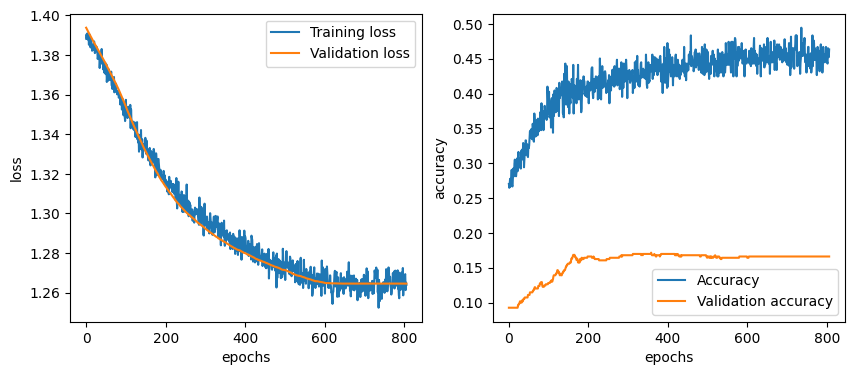

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("loss")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("accuracy")
ax[0].plot(train_losses, label="Training loss")
ax[0].plot(val_losses, label="Validation loss")
ax[1].plot(acc_history, label="Accuracy")
ax[1].plot(acc_val_history, label="Validation accuracy")
ax[0].legend()
ax[1].legend()
plt.show()

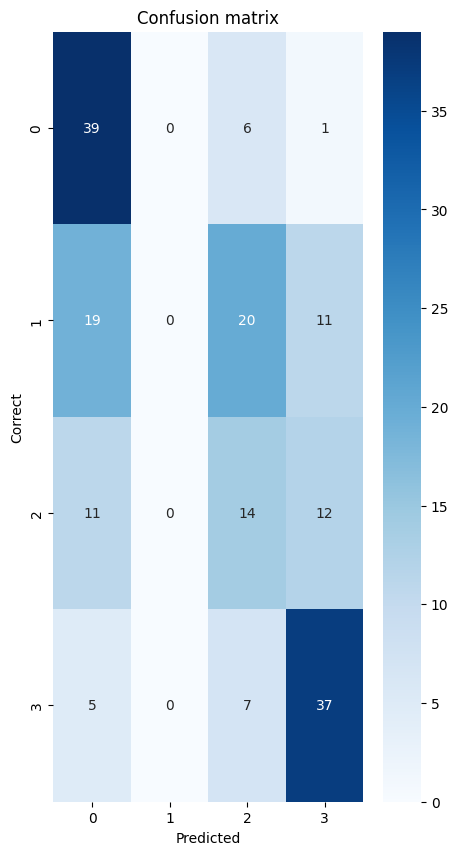

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = cl_model(x_test_tensor)
y_pred = np.argmax(y_pred.detach().numpy(),axis=1)
cm = confusion_matrix(np.argmax(y_onehot_test,axis=1),y_pred)

plt.figure(figsize=(5, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Correct')
plt.show()